# Churn Prediction with Tensorflow 2.0

### Logistic Regression is first used and compared with TF v2

#### This is an hands-on practice

In [218]:
# Importing some packages

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split

In [184]:
# read csv file
data = pd.read_csv('churn_data.csv')

### Exploratory Data Analysis

In [185]:
data.head()

,user,churn,age,housing,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,...,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
0,55409,0,37.0,na,NaN,0,0,0,0,0,...,0,0,0,0,Leo,1,0,NaN,0.00,0
1,23547,0,28.0,R,486.0,0,0,1,0,0,...,0,0,0,0,Leo,0,0,44.0,1.47,1
2,58313,0,35.0,R,561.0,47,2,86,47,0,...,0,0,0,0,Capricorn,1,0,65.0,2.17,0
3,8095,0,26.0,R,567.0,26,3,38,25,0,...,0,0,0,0,Capricorn,0,0,33.0,1.10,1
4,61353,1,27.0,na,NaN,0,0,2,0,0,...,0,0,0,0,Aries,1,0,1.0,0.03,0


In [186]:
data.describe()

,user,churn,age,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,...,registered_phones,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
count,27000.000000,27000.000000,26996.000000,18969.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,...,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,23773.000000,27000.000000,27000.000000
mean,35422.702519,0.413852,32.219921,542.944225,3.341556,0.307000,28.062519,3.273481,0.073778,92.625778,...,0.420926,0.001296,0.018815,0.018185,0.004889,0.173444,0.018074,29.110125,0.907684,0.318037
std,20321.006678,0.492532,9.964838,61.059315,9.131406,1.055416,42.219686,8.953077,0.437299,88.869343,...,0.912831,0.035981,0.135873,0.133623,0.069751,0.378638,0.133222,21.973478,0.752016,0.465723
min,1.000000,0.000000,17.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,17810.500000,0.000000,25.000000,507.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.200000,0.000000
50%,35749.000000,0.000000,30.000000,542.000000,0.000000,0.000000,9.000000,0.000000,0.000000,65.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,0.780000,0.000000
75%,53244.250000,1.000000,37.000000,578.000000,1.000000,0.000000,43.000000,1.000000,0.000000,164.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,48.000000,1.530000,1.000000
max,69658.000000,1.000000,91.000000,838.000000,65.000000,29.000000,1067.000000,63.000000,29.000000,522.000000,...,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,114.000000,4.000000,1.000000


In [187]:
data.shape

(27000, 31)

In [188]:
#  Display rows of users with credit score less than 300 
data[data.credit_score < 300]

,user,churn,age,housing,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,...,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
7347,45685,1,22.0,na,3.0,0,0,16,0,0,...,0,0,0,0,na,0,0,16.0,0.53,0
9244,33603,0,28.0,na,2.0,0,0,5,0,0,...,0,0,0,0,Aquarius,0,0,1.0,0.04,0
11978,2465,0,32.0,R,3.0,42,5,56,42,0,...,0,0,0,0,Libra,0,0,24.0,0.80,1
18857,33700,1,22.0,na,2.0,0,0,0,0,0,...,0,0,0,0,Gemini,0,0,6.0,0.20,0


In [189]:
data = data[data.credit_score >= 300]

In [190]:
data.isna().sum()

user                          0
churn                         0
age                           0
housing                       0
credit_score                  0
deposits                      0
withdrawal                    0
purchases_partners            0
purchases                     0
cc_taken                      0
cc_recommended                0
cc_disliked                   0
cc_liked                      0
cc_application_begin          0
app_downloaded                0
web_user                      0
app_web_user                  0
ios_user                      0
android_user                  0
registered_phones             0
payment_type                  0
waiting_4_loan                0
cancelled_loan                0
received_loan                 0
rejected_loan                 0
zodiac_sign                   0
left_for_two_month_plus       0
left_for_one_month            0
rewards_earned             1190
reward_rate                   0
is_referred                   0
dtype: i

In [191]:
data = data.drop(columns= ['credit_score', 'rewards_earned'])

In [192]:
data2 = data.copy().drop(columns = ['user', 'churn','housing','payment_type','zodiac_sign'])

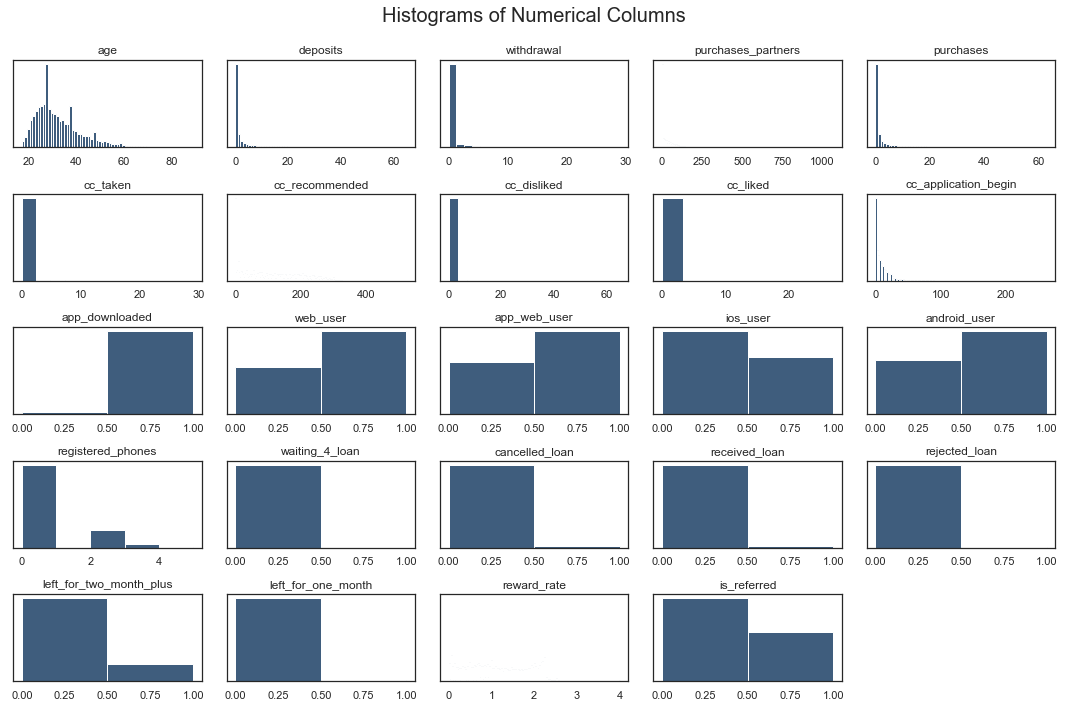

In [193]:
# Histogram of Numerical Columns

fig = plt.figure(figsize=(15,12))
plt.suptitle('Histograms of Numerical Columns', fontsize=20)
for i in range(1, data2.shape[1]+1):
    plt.subplot(6,5,i)
    f = plt.gca()
    f.axes.get_yaxis().set_visible(False)
    f.set_title(data2.columns.values[i-1])
    
    vals = np.size(data2.iloc[:, i-1].unique())
    
    plt.hist(data2.iloc[:, i-1], bins =vals, color='#3F5D7D')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

In [194]:
data3 = data[['housing', 'is_referred', 'app_downloaded',
                    'web_user', 'app_web_user', 'ios_user',
                    'android_user', 'registered_phones', 'payment_type',
                    'waiting_4_loan', 'cancelled_loan',
                    'received_loan', 'rejected_loan', 'zodiac_sign',
                    'left_for_two_month_plus', 'left_for_one_month', 'is_referred']]

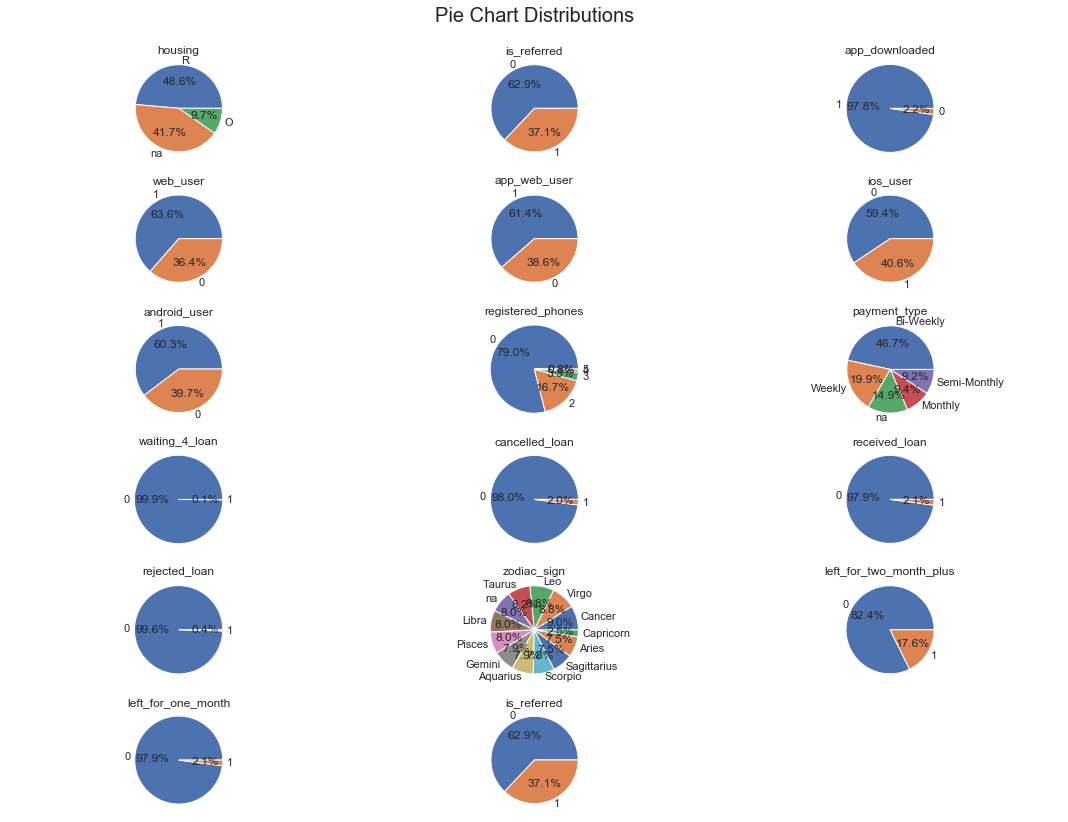

In [195]:
fig = plt.figure(figsize=(15,12))
plt.suptitle('Pie Chart Distributions', fontsize=20)
for i in range(1, data3.shape[1]+1):
    plt.subplot(6,3,i)
    f = plt.gca()
    f.axes.get_yaxis().set_visible(False)
    f.set_title(data3.columns.values[i-1])
    
    values = data3.iloc[:, i - 1].value_counts(normalize = True).values
    index = data3.iloc[:, i - 1].value_counts(normalize = True).index
    plt.pie(values, labels = index, autopct='%1.1f%%')
    plt.axis('equal')
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

In [196]:
data[data3.waiting_4_loan == 1].churn.value_counts()

0    15
1     3
Name: churn, dtype: int64

In [197]:
data[data3.cancelled_loan == 1].churn.value_counts()

0    194
1    187
Name: churn, dtype: int64

In [198]:
data[data3.received_loan == 1].churn.value_counts()

1    233
0    162
Name: churn, dtype: int64

In [199]:
data[data3.rejected_loan == 1].churn.value_counts()

1    64
0    17
Name: churn, dtype: int64

In [200]:
data[data3.left_for_one_month == 1].churn.value_counts()

1    207
0    184
Name: churn, dtype: int64

In [201]:
data[data3.app_downloaded == 0].churn.value_counts()

1    267
0    154
Name: churn, dtype: int64

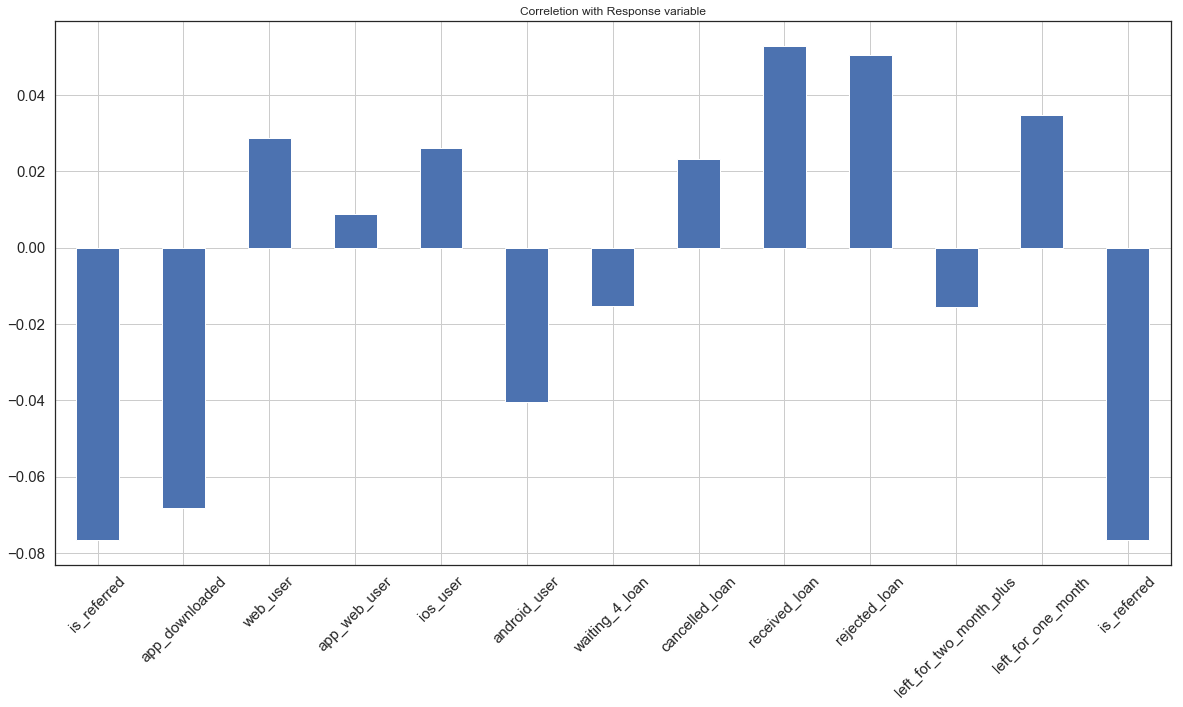

In [202]:
# Correlation of some numerical columns with the Target column: churn

data3.drop(columns = ['housing', 'payment_type',
                         'registered_phones', 'zodiac_sign']).\
corrwith(data.churn).plot.bar(figsize=(20,10), \
                              title = 'Correletion with Response variable',\
                             fontsize = 15, rot = 45, grid = True)

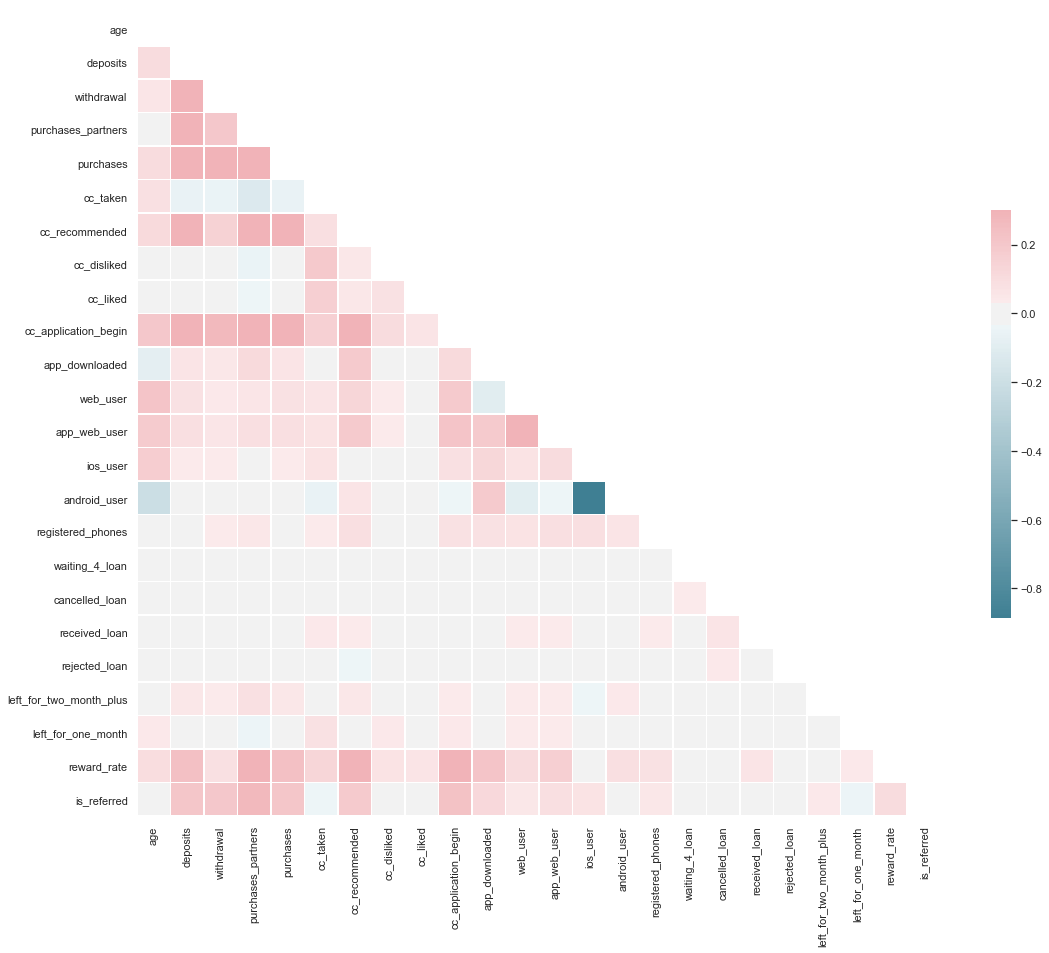

In [203]:
# Correlation between columns

sns.set(style='white')

corr = data.drop(columns = ['user', 'churn']).corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f,ax = plt.subplots(figsize=(18,15))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [204]:
data.columns

Index(['user', 'churn', 'age', 'housing', 'deposits', 'withdrawal',
       'purchases_partners', 'purchases', 'cc_taken', 'cc_recommended',
       'cc_disliked', 'cc_liked', 'cc_application_begin', 'app_downloaded',
       'web_user', 'app_web_user', 'ios_user', 'android_user',
       'registered_phones', 'payment_type', 'waiting_4_loan', 'cancelled_loan',
       'received_loan', 'rejected_loan', 'zodiac_sign',
       'left_for_two_month_plus', 'left_for_one_month', 'reward_rate',
       'is_referred'],
      dtype='object')

In [205]:
# user id of customers' column is dropped

user_identifier = data['user']
data = data.drop(columns='user')

In [206]:
data.housing.value_counts()

R     9221
na    7910
O     1834
Name: housing, dtype: int64

In [207]:
data.groupby('housing')['churn'].value_counts()

housing  churn
O        0        1224
         1         610
R        0        5621
         1        3600
na       0        4316
         1        3594
Name: churn, dtype: int64

In [208]:
data.groupby('housing')['churn'].nunique().reset_index()

,housing,churn
0,O,2
1,R,2
2,na,2


In [209]:
data.groupby('payment_type')['churn'].value_counts()

payment_type  churn
Bi-Weekly     0        5336
              1        3512
Monthly       0        1054
              1         723
Semi-Monthly  0        1081
              1         664
Weekly        0        2016
              1        1760
na            0        1674
              1        1145
Name: churn, dtype: int64

In [210]:
data.groupby('zodiac_sign')['churn'].value_counts()

zodiac_sign  churn
Aquarius     0        919
             1        579
Aries        0        836
             1        588
Cancer       0        962
             1        737
Capricorn    0        265
             1        217
Gemini       0        881
             1        620
Leo          0        993
             1        677
Libra        0        915
             1        599
Pisces       0        840
             1        673
Sagittarius  0        830
             1        598
Scorpio      0        898
             1        583
Taurus       0        941
             1        617
Virgo        0        971
             1        707
na           0        910
             1        609
Name: churn, dtype: int64

In [211]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18965 entries, 1 to 26999
Data columns (total 28 columns):
churn                      18965 non-null int64
age                        18965 non-null float64
housing                    18965 non-null object
deposits                   18965 non-null int64
withdrawal                 18965 non-null int64
purchases_partners         18965 non-null int64
purchases                  18965 non-null int64
cc_taken                   18965 non-null int64
cc_recommended             18965 non-null int64
cc_disliked                18965 non-null int64
cc_liked                   18965 non-null int64
cc_application_begin       18965 non-null int64
app_downloaded             18965 non-null int64
web_user                   18965 non-null int64
app_web_user               18965 non-null int64
ios_user                   18965 non-null int64
android_user               18965 non-null int64
registered_phones          18965 non-null int64
payment_type            

In [212]:
##One hot encoding
df = pd.concat([data[['churn', 'age', 'deposits', 'withdrawal',
       'purchases_partners', 'purchases', 'cc_taken', 'cc_recommended',
       'cc_disliked', 'cc_liked', 'cc_application_begin', 'app_downloaded',
       'web_user', 'app_web_user', 'ios_user', 'android_user',
       'registered_phones', 'waiting_4_loan', 'cancelled_loan',
       'received_loan', 'rejected_loan',
       'left_for_two_month_plus', 'left_for_one_month', 'reward_rate',
       'is_referred']],
               pd.get_dummies(data['housing'],drop_first = True),
                      pd.get_dummies(data['payment_type'],drop_first = True),
                      pd.get_dummies(data['zodiac_sign'],drop_first = True)],axis=1)

In [217]:
df.columns

Index(['churn', 'age', 'deposits', 'withdrawal', 'purchases_partners',
       'purchases', 'cc_taken', 'cc_recommended', 'cc_disliked', 'cc_liked',
       'cc_application_begin', 'app_downloaded', 'web_user', 'app_web_user',
       'ios_user', 'android_user', 'registered_phones', 'waiting_4_loan',
       'cancelled_loan', 'received_loan', 'rejected_loan',
       'left_for_two_month_plus', 'left_for_one_month', 'reward_rate',
       'is_referred', 'R', 'Monthly', 'Semi-Monthly', 'Weekly', 'Aries',
       'Cancer', 'Capricorn', 'Gemini', 'Leo', 'Libra', 'Pisces',
       'Sagittarius', 'Scorpio', 'Taurus', 'Virgo'],
      dtype='object')

In [216]:
# drop the not available ('na') columns
df = df.drop(columns = ['na'])

In [219]:
# Spliting of data into train and test sets
# the backslash '\' is to break line of equation into several lines for ease of reading

X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='churn'),\
                                                   df['churn'], \
                                                   test_size = 0.2,\
                                                   random_state = 0)

In [220]:
# Normalize Data

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()

X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_test2 = pd.DataFrame(sc_X.transform(X_test))
X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values
X_train2.index = X_train.index.values
X_test2.index = X_test.index.values
X_train = X_train2
X_test = X_test2

C:\Users\GUY Danot Sonof\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\GUY Danot Sonof\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  import sys


In [41]:
# Data Normalization Alternative

# X_train = X_train/X_train.max()
# X_test = X_test/X_test.max()

### Model Building

In [221]:
# Using Logistic Regression

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0, solver= 'lbfgs')
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

Test Data Accuracy : 0.6564724492486159
Test Data Precision: 0.5992452830188679
Test Data Recall   : 0.5070242656449553
Test Data F1 Score : 0.5492909028017986


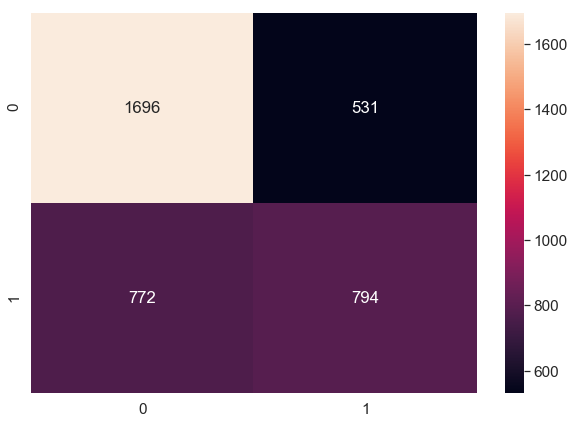

In [224]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
cm = confusion_matrix(y_test, y_pred)
print('Test Data Accuracy : {}'.format(accuracy_score(y_test, y_pred)))
print('Test Data Precision: {}'.format(precision_score(y_test, y_pred))) # tp / (tp + fp)
print('Test Data Recall   : {}'.format(recall_score(y_test, y_pred))) # tp / (tp + fn)
print('Test Data F1 Score : {}'.format(f1_score(y_test, y_pred)))

df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g')

In [225]:
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

Test Data Accuracy: 0.6565


## Using TensorFlow

In [226]:
# Setup and importing of packages

from __future__ import absolute_import, division, print_function, unicode_literals

try:
  # Use the %tensorflow_version magic if in colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.0.0


In [228]:
# Building and compiling the keras model in a fuction for re-use

def build_model():
  model = keras.Sequential([
    layers.Dense(256, activation='relu', input_shape=[len(X_train.keys())]),
    layers.Dropout(0.5),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')
  ])

  model.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])
  return model

# the function  is saved in a variable
model = build_model()

In [229]:
model.summary()

Model: "sequential_95"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_285 (Dense)            (None, 256)               10240     
_________________________________________________________________
dropout_95 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_286 (Dense)            (None, 512)               131584    
_________________________________________________________________
dense_287 (Dense)            (None, 1)                 513       
Total params: 142,337
Trainable params: 142,337
Non-trainable params: 0
_________________________________________________________________


In [236]:
# Trainging of model

EPOCHS = 100

history = model.fit(
#     data.values or np.array(data) can be use in this scenerio
  X_train.values, y_train.values,
  epochs=EPOCHS, batch_size=20, 
    validation_data=(np.array(X_test), np.array(y_test)), 
    verbose=2)

Train on 15172 samples, validate on 3793 samples
Epoch 1/100
15172/15172 - 2s - loss: 0.5690 - accuracy: 0.7020 - val_loss: 0.5823 - val_accuracy: 0.6921
Epoch 2/100


KeyboardInterrupt: 

In [231]:
scores = model.evaluate(X_train.values, y_train.values, verbose=0)
print('Accuracy on training data: {}% \n Error on training data: {}'.format(scores[1], 1 - scores[1]))   
 
scores2 = model.evaluate(X_test.values, y_test.values, verbose=0)
print('Accuracy on test data: {}% \n Error on test data: {}'.format(scores2[1], 1 - scores2[1])) 

Accuracy on training data: 0.7200764417648315% 
 Error on training data: 0.27992355823516846
Accuracy on test data: 0.6960189938545227% 
 Error on test data: 0.3039810061454773


Test Data Accuracy : 0.7015554969680992
Test Data Precision: 0.6877162629757786
Test Data Recall   : 0.5076628352490421
Test Data F1 Score : 0.5841293166789125


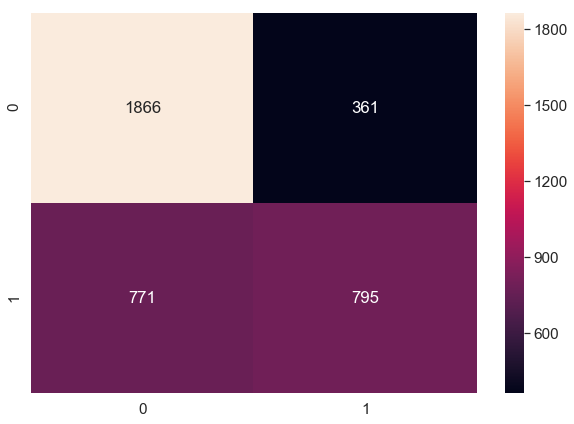

In [264]:
# Predicting the test data 

pred_test = model.predict(X_test.values)
# the Equality value can be adjusted as desired
pred_test = (pred_test > 0.5)
pred_test = pred_test.flatten().astype(int)


# Using Confusion Matrix
cm_tf=tf.math.confusion_matrix(
    y_test,
    pred_test,
)

print('Test Data Accuracy : {}'.format(accuracy_score(y_test, pred_test)))
print('Test Data Precision: {}'.format(precision_score(y_test, pred_test))) # tp / (tp + fp)
print('Test Data Recall   : {}'.format(recall_score(y_test, pred_test))) # tp / (tp + fn)
print('Test Data F1 Score : {}'.format(f1_score(y_test, pred_test)))

df_cm = pd.DataFrame(cm_tf.numpy(), index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g')

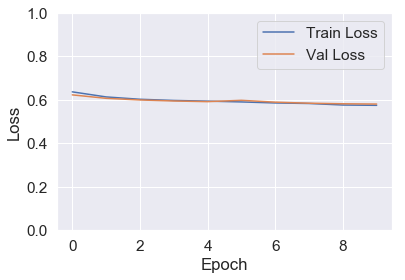

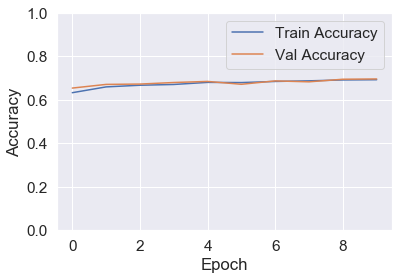

In [235]:
# Graph of the Losses and Accuracies of each epoch

def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.plot(hist['epoch'], hist['loss'],
           label='Train Loss')
  plt.plot(hist['epoch'], hist['val_loss'],
           label = 'Val Loss')
  plt.ylim([0,1])
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.plot(hist['epoch'], hist['accuracy'],
           label='Train Accuracy')
  plt.plot(hist['epoch'], hist['val_accuracy'],
           label = 'Val Accuracy')
  plt.ylim([0,1])
  plt.legend()
  plt.show()


plot_history(history)

In [237]:
# Overfitting as seen from the above graph needs to be reduce
# This is done by enngaging EarlyStopping when there is no improvement in the 'val_accuracy'
# on ten(10) consecutive epochs
# The patience parameter is the amount of epochs to check for improvement

early_stop = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10)

history = model.fit(X_train.values, y_train.values, epochs=EPOCHS,
                    validation_data=(X_test.values, y_test.values),
                    batch_size=20, verbose=1, callbacks=[early_stop])

Train on 15172 samples, validate on 3793 samples
Epoch 1/100
15172/15172 [==============================] - 2s 145us/sample - loss: 0.5668 - accuracy: 0.7010 - val_loss: 0.5808 - val_accuracy: 0.6960
Epoch 2/100
15172/15172 [==============================] - 2s 144us/sample - loss: 0.5666 - accuracy: 0.7040 - val_loss: 0.5801 - val_accuracy: 0.6965
Epoch 3/100
15172/15172 [==============================] - 2s 143us/sample - loss: 0.5602 - accuracy: 0.7064 - val_loss: 0.5751 - val_accuracy: 0.6892
Epoch 4/100
15172/15172 [==============================] - 2s 143us/sample - loss: 0.5590 - accuracy: 0.7057 - val_loss: 0.5784 - val_accuracy: 0.6878
Epoch 5/100
15172/15172 [==============================] - 2s 143us/sample - loss: 0.5574 - accuracy: 0.7079 - val_loss: 0.5814 - val_accuracy: 0.6926
Epoch 6/100
15172/15172 [==============================] - 2s 143us/sample - loss: 0.5526 - accuracy: 0.7076 - val_loss: 0.5827 - val_accuracy: 0.6844
Epoch 7/100
15172/15172 [====================

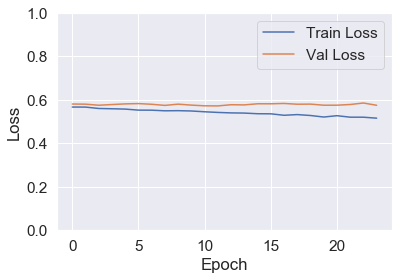

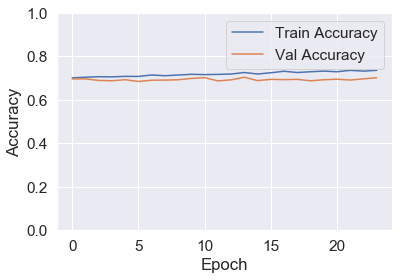

In [238]:
# Graph of Loss and Accuracy of each epoch

plot_history(history)

Test Data Accuracy : 0.7015554969680992
Test Data Precision: 0.6877162629757786
Test Data Recall   : 0.5076628352490421
Test Data F1 Score : 0.5841293166789125


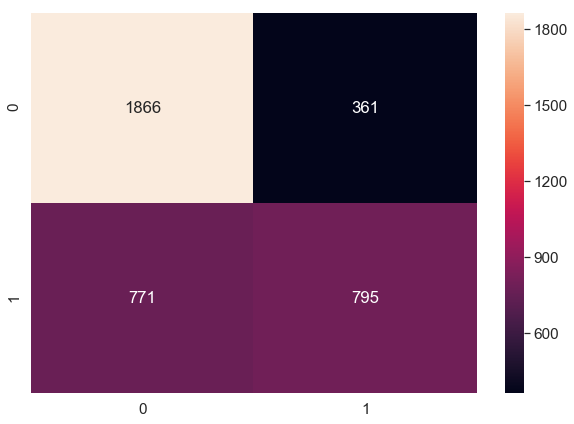

In [263]:
# Prediction on the new model

pred_test = model.predict(X_test.values)
pred_test = (pred_test > 0.5)
pred_test = pred_test.flatten().astype(int)


# The Confusion Matrix
cm_tf=tf.math.confusion_matrix(
    y_test,
    pred_test,
)

print('Test Data Accuracy : {}'.format(accuracy_score(y_test, pred_test)))
print('Test Data Precision: {}'.format(precision_score(y_test, pred_test))) # tp / (tp + fp)
print('Test Data Recall   : {}'.format(recall_score(y_test, pred_test))) # tp / (tp + fn)
print('Test Data F1 Score : {}'.format(f1_score(y_test, pred_test)))

df_cm = pd.DataFrame(cm_tf.numpy(), index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g')

In [266]:
# Formatting Final Results
final_results = pd.concat([y_test, user_identifier], axis = 1).dropna()
final_results['predicted_churn'] = pred_test
final_results = final_results[['user', 'churn', 'predicted_churn']].reset_index(drop=True)

print (final_results)

       user  churn  predicted_churn
0     20839    0.0                0
1     15359    1.0                0
2     34210    1.0                0
3     57608    1.0                0
4     11790    0.0                0
5      1826    1.0                0
6      8508    0.0                0
7     50946    1.0                0
8     50130    1.0                0
9     55422    0.0                0
10      259    1.0                1
11    17451    0.0                0
12    41909    0.0                0
13    38825    0.0                1
14    19314    1.0                0
15    26916    0.0                0
16    30614    0.0                0
17    30329    1.0                1
18    38853    0.0                1
19    15592    1.0                1
20    40888    0.0                1
21    17918    1.0                0
22    52613    0.0                0
23      725    0.0                0
24    51797    0.0                0
25     2601    0.0                0
26    33990    0.0          

In [271]:
print("Test Data Accuracy using Logistic Regression: {}".format(accuracy_score(y_test, y_pred)))
print("Test Data Accuracy using TendorFlow         : {}".format(accuracy_score(y_test, pred_test)))

Test Data Accuracy using Logistic Regression: 0.6564724492486159
Test Data Accuracy using TendorFlow         : 0.7015554969680992


From above TensorFlow did better.